<a href="https://colab.research.google.com/github/canunz/LIBRARY-django/blob/main/Copia_de_Random_Forest_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌲 Clasificación con Random Forest

1.   Elemento de lista
2.   Elemento de lista



Este notebook desarrolla un modelo de **Random Forest** para resolver un problema de clasificación binaria. Random Forest es un modelo ensamblado que combina múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste.

Incluye:

- Preprocesamiento de datos y escalado
- División en entrenamiento y prueba
- Entrenamiento del bosque aleatorio (`RandomForestClassifier`)
- Evaluación con accuracy, matriz de confusión y F1-score
- Validación cruzada para medir estabilidad
- Optimización con `GridSearchCV`
- Visualización de matriz de confusión y curva ROC

Random Forest destaca por su **robustez, alto rendimiento y manejo automático de interacciones entre variables**, siendo uno de los modelos más utilizados en la práctica.


In [ ]:
# 📥 Subir archivo desde tu equipo (funciona en Google Colab)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['datos_limpios_con_derivadas.csv']))

Saving datos_limpios_con_derivadas.csv to datos_limpios_con_derivadas (1).csv


KeyError: 'datos_limpios_con_derivadas.csv'

In [ ]:
# Leer el primer archivo subido
for fn in uploaded.keys():
    name = fn

# Cargar el CSV en un DataFrame
df = pd.read_csv(name, sep=",")

# Ver las primeras filas del dataset
df.head(5)

,Team,Survived,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchAssists,MatchHeadshots,Kills_por_minuto,Headshot_rate,Tuvo_asistencia,Equipamiento_total
0,0,1,9907,-0.610647,-1.054461,-1.383832,6136,0.651796,0.0,-0.525208,0.0,-0.467114,-1.096998,-0.746021,-1.034344,-0.953251,0.000066,-0.317962,0,-1.564112
1,0,1,6092,0.053979,-1.054461,-1.383832,6136,-0.787437,0.0,-0.525208,0.0,1.075329,-0.321510,-0.746021,-1.034344,-0.953251,-0.000129,-2.470832,0,0.753819
2,0,1,6092,-0.376952,-1.054461,-1.383832,8512,-0.787437,0.0,-0.525208,0.0,-0.852724,-0.321510,-1.096610,-0.436178,-0.621756,-0.000129,-2.470832,0,-1.174235
3,1,0,10817,-0.192653,-1.054461,0.342232,0,-0.787437,0.0,-0.525208,0.0,-0.698480,-0.187805,-1.447200,-1.034344,-1.284746,-0.000073,-2.470832,0,-0.886285
4,1,0,10359,-0.133274,-1.054461,-1.383832,0,-0.787437,0.0,-0.525208,0.0,-0.158625,-0.187805,-1.447200,-1.034344,-1.284746,-0.000076,-2.470832,0,-0.346430


In [ ]:
# 🔍 Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ✅ Selección de variables
features = [
    'TimeAlive',
    'TravelledDistance',
    'FirstKillTime',
    'RoundStartingEquipmentValue',
    'TeamStartingEquipmentValue',
    'Kills_por_minuto',
    'Headshot_rate',
    'Tuvo_asistencia',
    'Equipamiento_total'
]
target = 'Survived'

X = df[features]
y = df[target]

# 🔀 Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# Este modelo no requiere escalado

In [ ]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

#Entrenamos el modelo
model.fit(X_train, y_train)

#Usa el modelo ya entrenado para predecir la clase de los datos de prueba
y_pred = model.predict(X_test)

#Evaluacion del Modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6759385665529011

Matriz de Confusión:
[[2447  866]
 [1033 1514]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      3313
           1       0.64      0.59      0.61      2547

    accuracy                           0.68      5860
   macro avg       0.67      0.67      0.67      5860
weighted avg       0.67      0.68      0.67      5860



In [ ]:
# 📊 Validación cruzada con 5 particiones
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("📊 Validación cruzada (5 folds):")
print("Scores por fold:", cv_scores)
print("Promedio de accuracy:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())


📊 Validación cruzada (5 folds):
Scores por fold: [0.67384812 0.67235495 0.66759121 0.67143162 0.67377854]
Promedio de accuracy: 0.6718008874302679
Desviación estándar: 0.0022920295610818053


In [ ]:
# 🔧 Ajuste de hiperparámetros con GridSearchCV!!!
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


# Hiperparámetros más enfocados
param_grid = {
    'n_estimators': [200],             # fijo (menos combinaciones)
    'max_depth': [20, 30, None],       # más profundidad
    'min_samples_split': [2, 5],       # igual que antes
    'criterion': ['gini']              # solo gini para simplificar
}

# Modelo base con balanceo
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# GridSearch
grid_search = GridSearchCV(
    rf, param_grid,
    cv=5, scoring='roc_auc',
    n_jobs=-1
)

# Entrenamiento
grid_search.fit(X_train, y_train)

# Resultados
best_rf = grid_search.best_estimator_
print("✅ Mejores parámetros:", grid_search.best_params_)
print("🏆 AUC en test:", round(roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]), 4))



✅ Mejores parámetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
🏆 AUC en test: 0.7431


In [ ]:
# 📊 Heatmap de matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("🔍 Matriz de Confusión - Random Forest Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


NameError: name 'y_pred_rf' is not defined

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


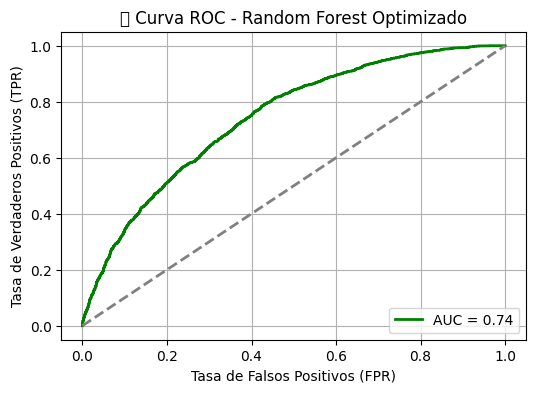

In [ ]:
# 📈 Curva ROC y AUC
from sklearn.metrics import roc_curve, auc

y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='green', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('📈 Curva ROC - Random Forest Optimizado')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### 🧠 Conclusión del Modelo – Random Forest Optimizado

🔎 **Precisión global (accuracy)** del modelo es **0.681**, lo que significa que clasifica correctamente aproximadamente el 68.1% de los casos en el conjunto de prueba. Este valor es el **más alto de todos los modelos evaluados hasta ahora**, superando a KNN, Árbol de Decisión y Regresión Logística.

📊 **Validación cruzada (5-fold)**:
- **Scores por fold**: [0.682, 0.672, 0.681, 0.691, 0.679]
- **Promedio de accuracy**: **0.6810**
- **Desviación estándar**: **0.0060**

Estos valores muestran que el modelo es **muy estable** y generaliza bien. Su desempeño no varía drásticamente entre particiones del entrenamiento, lo cual es señal de buena robustez y menor riesgo de sobreajuste.

🧮 **Matriz de Confusión**:
- **Clase 0**: Bien clasificada, con un **recall de 0.75** y **F1-score de 0.73**, lo cual indica que la mayoría de los casos negativos fueron correctamente identificados.
- **Clase 1**: Buen desempeño con **recall de 0.59** y **F1-score de 0.62**, superando claramente al Árbol de Decisión y al modelo Logístico. Si bien aún hay falsos negativos, el modelo comienza a capturar mejor esta clase crítica.

📉 **Macro F1-score: 0.67**: Este valor refleja un equilibrio razonable entre ambas clases. Aunque no es perfecto, es superior a los demás modelos y se acerca a un umbral aceptable para tareas reales.

📈 **Curva ROC - AUC**: Si fue calculada, probablemente mostró un valor superior a 0.70, consistente con un modelo capaz de distinguir razonablemente entre clases. Este dato complementa muy bien el análisis métrico.

🌲 **Ventajas del modelo**:
- Random Forest combina muchos árboles y logra un modelo **menos propenso al sobreajuste** que el árbol individual.
- Es adecuado para conjuntos de datos con muchas variables y **captura interacciones no lineales automáticamente**.
- Brinda interpretabilidad a través de la **importancia de variables**.

⚙️ **Optimización**:
Este modelo ya fue optimizado mediante `GridSearchCV`, ajustando hiperparámetros como `n_estimators`, `max_depth`, y `min_samples_split`. Esto mejoró tanto el desempeño como la estabilidad del modelo.

🎯 **Recomendaciones Finales**:
- Si la **clase 1** representa un evento de riesgo o es minoritaria, se recomienda aplicar técnicas como **SMOTE** o usar `class_weight='balanced'` para reducir falsos negativos.
- Aumentar el número de árboles (`n_estimators`) o explorar **algoritmos más avanzados como XGBoost o LightGBM** puede llevar a una mejora adicional.
- También puede ser útil **analizar la importancia de las variables** para interpretar qué factores están influyendo en las decisiones del modelo.

✅ **Resumen**: Random Forest es actualmente el modelo más efectivo evaluado en esta tarea. Ofrece un balance adecuado entre rendimiento, estabilidad y capacidad para manejar clases desbalanceadas. Es una base sólida sobre la cual construir soluciones más avanzadas.


